In [1]:
import sys

In [2]:
sys.version

'3.6.9 (default, Apr 20 2021, 10:09:27) \n[GCC 9.3.0]'

In [3]:
%matplotlib inline
import os
import quantities as pq
import matplotlib.pyplot as plt
import sciunit
import sciunit.scores
import neuronunit
from pprint import pprint
from neuronunit.models.reduced import ReducedModel
from neuronunit.capabilities import ProducesSpikes
from neuronunit.tests.passive import InputResistanceTest

Could not load GLIFBackend


In [4]:
# Assumes imported neuronunit is from source, e.g. pip install -e
path = os.path.join(neuronunit.__path__[0],'models/NeuroML2/LEMS_2007One.xml')
# Instantiate three identical models
models = [ReducedModel(path, name='Izhikevich_{}'.format(i), backend='jNeuroML') for i in range(4)]

In [5]:
# Change the parameters of the second model
models[1].set_attrs(**{'izhikevich2007Cell':{'a':'0.04 per_ms'}})
models[1].name = 'Izhikevich_alt'

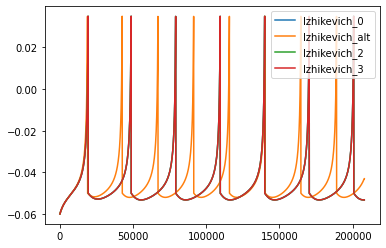

In [6]:
for model in models:
    plt.plot(model.get_membrane_potential(),label=model)
plt.legend();

In [7]:
# A new M2M test which will compare the equality of spike counts across models
from scidash_api.tests import RandomTest

In [8]:
test = InputResistanceTest({'mean': 5*pq.MOhm,'std': 10.0*pq.MOhm,'n': 5},name='Input Resistance Test')

In [9]:
s = test.judge(models)

Score: Z = 7.46 for Izhikevich_0 on Input Resistance Test
Score: Z = 7.46 for Izhikevich_alt on Input Resistance Test
Score: Z = 7.46 for Izhikevich_2 on Input Resistance Test
Score: Z = 7.46 for Izhikevich_3 on Input Resistance Test


In [10]:
s

,Input Resistance Test
Izhikevich_0,Z = 7.46
Izhikevich_alt,Z = 7.46
Izhikevich_2,Z = 7.46
Izhikevich_3,Z = 7.46


In [11]:
x = test.json(string=False, add_props=True)
pprint(x)

{'_class': {'import_path': 'neuronunit.tests.passive.InputResistanceTest',
            'name': 'InputResistanceTest',
            'url': 'http://github.com/scidash/neuronunit.git'},
 'converter': None,
 'default_params': {'amplitude': {'base': '-10.0', 'units': 'pA'},
                    'delay': {'base': '100.0', 'units': 'ms'},
                    'dt': {'base': '0.025', 'units': 'ms'},
                    'duration': {'base': '500.0', 'units': 'ms'},
                    'padding': {'base': '200.0', 'units': 'ms'}},
 'description': 'A test of the input resistance of a cell.',
 'ephysprop_name': 'Input Resistance',
 'hash': 'ec54c6f982a6ba9201f9077493192ba40699b0ce12243b901b2b8425',
 'name': 'Input Resistance Test',
 'observation': {'mean': {'base': '5.0', 'units': 'megaohm'},
                 'n': 5,
                 'std': {'base': '10.0', 'units': 'megaohm'}},
 'observation_schema': [['Mean, Standard Deviation, N',
                         {'mean': {'required': True, 'units': True}

In [12]:
def check_url(x):
    if not x.json(string=False).get('url'):
        print("Model has no associated url; please set the url attribute of the model")
check_url(models[0])

In [13]:
# How do you want your GitHub URLs?  
lems_url = ("https://github.com/scidash/neuronunit/blob/master/neuronunit/"
            "models/NeuroML2/LEMS_2007One.xml")
models[0]._url = lems_url
models[1]._url = lems_url
models[2]._url = lems_url
models[3]._url = lems_url

In [14]:
check_url(models[0])

In [15]:
# Has fewer attributes because most of them came from the LEMS file so those are assumed
# to still be the values in memory.  If we need to extract these then I need to find a
# way to read them from the file; however, there may be no general way to do so for all
# LEMS files, and certainly not for all possible models.  
x = models[0].json(string=False)
pprint(x)

{'_class': {'import_path': 'neuronunit.models.reduced.ReducedModel',
            'name': 'ReducedModel',
            'url': 'https://github.com/scidash/neuronunit/blob/master/neuronunit/models/NeuroML2/LEMS_2007One.xml'},
 'attrs': {},
 'backend': 'jNeuroML',
 'capabilities': ['sciunit.capabilities.Runnable',
                  'neuronunit.capabilities.ReceivesSquareCurrent',
                  'neuronunit.capabilities.ProducesActionPotentials',
                  'neuronunit.capabilities.ProducesSpikes',
                  'neuronunit.capabilities.ProducesMembranePotential'],
 'default_run_params': {'default_java_max_memory': '400M',
                        'nogui': True,
                        'v': False},
 'description': '',
 'extra_capability_checks': {"<class 'neuronunit.capabilities.ReceivesSquareCurrent'>": 'has_pulse_generator'},
 'failed_extra_capabilities': [],
 'from_url': False,
 'hash': '95f7ec5658afed5ab15725425bf830f2f8f57a8bc6995f2052f666fc',
 'lems_file_path': '/tmp/tmpow

In [16]:
# Has more attributes because some of the original attributes from the LEMS file 
# were replaced with new ones in this session
x = models[1].json(string=False)
pprint(x)

{'_class': {'import_path': 'neuronunit.models.reduced.ReducedModel',
            'name': 'ReducedModel',
            'url': 'https://github.com/scidash/neuronunit/blob/master/neuronunit/models/NeuroML2/LEMS_2007One.xml'},
 'attrs': {'izhikevich2007Cell': {'a': '0.04 per_ms'}},
 'backend': 'jNeuroML',
 'capabilities': ['sciunit.capabilities.Runnable',
                  'neuronunit.capabilities.ReceivesSquareCurrent',
                  'neuronunit.capabilities.ProducesActionPotentials',
                  'neuronunit.capabilities.ProducesSpikes',
                  'neuronunit.capabilities.ProducesMembranePotential'],
 'default_run_params': {'default_java_max_memory': '400M',
                        'nogui': True,
                        'v': False},
 'description': '',
 'extra_capability_checks': {"<class 'neuronunit.capabilities.ReceivesSquareCurrent'>": 'has_pulse_generator'},
 'failed_extra_capabilities': [],
 'from_url': False,
 'hash': '3cd0e86462b4a3b453f44f52841f5b105e9de5201a181af

In [17]:
# generate a set of tests to create a suite out of them
tests = []
for x in range(5):
    tests.append(InputResistanceTest({'mean': (x+1)*0.5*pq.MOhm,'std': (x+1)*10.0*pq.MOhm,'n': (x+1)*3},name='Another Test '+str(x)))
suite = sciunit.TestSuite(tests,name='My Test Suite')

In [18]:
score_matrix = suite.judge(models)

Score: Z = 7.91 for Izhikevich_0 on Another Test 0
Score: Z = 3.93 for Izhikevich_0 on Another Test 1
Score: Z = 2.60 for Izhikevich_0 on Another Test 2
Score: Z = 1.94 for Izhikevich_0 on Another Test 3
Score: Z = 1.54 for Izhikevich_0 on Another Test 4
Score: Z = 7.91 for Izhikevich_alt on Another Test 0
Score: Z = 3.93 for Izhikevich_alt on Another Test 1
Score: Z = 2.60 for Izhikevich_alt on Another Test 2
Score: Z = 1.94 for Izhikevich_alt on Another Test 3
Score: Z = 1.54 for Izhikevich_alt on Another Test 4
Score: Z = 7.91 for Izhikevich_2 on Another Test 0
Score: Z = 3.93 for Izhikevich_2 on Another Test 1
Score: Z = 2.60 for Izhikevich_2 on Another Test 2
Score: Z = 1.94 for Izhikevich_2 on Another Test 3
Score: Z = 1.54 for Izhikevich_2 on Another Test 4
Score: Z = 7.91 for Izhikevich_3 on Another Test 0
Score: Z = 3.93 for Izhikevich_3 on Another Test 1
Score: Z = 2.60 for Izhikevich_3 on Another Test 2
Score: Z = 1.94 for Izhikevich_3 on Another Test 3
Score: Z = 1.54 for I

In [19]:
from scidash_api import client

In [20]:
from scidash_api import client, settings
url = settings.get_config('ip')
client_instance = client.ScidashClient({"base_url": url},
                                       hostname="Host's machine")
client_instance.login(username='admin',
                      password='admin_test')
len(client_instance.token)

209

In [21]:
responses = client_instance.upload_suite_score(suite, score_matrix)

In [22]:
for response in responses:
    pprint(response.json())

{'data': {'error': None,
          'hash_id': 'b6d06769c9589f18d541c25c65934424c580fe295d0a7dc5f55e2e96_0138c6693cf401ba0dcf931c49a990',
          'id': 135,
          'model_instance': {'attributes': {},
                             'backend': None,
                             'hash_id': '6d90b2067e627f43a82475d7915c1745f7ba5aa93ae094ce98f9efba_0138c6693cf401ba0dcf931c49a990',
                             'id': 53,
                             'model_class': {'capabilities': [{'class_name': 'Runnable',
                                                               'id': 18},
                                                              {'class_name': 'ProducesActionPotentials',
                                                               'id': 20},
                                                              {'class_name': 'ProducesSpikes',
                                                               'id': 21},
                                                              {'clas

                                             'extra_capabilities': [19],
                                             'id': 14,
                                             'import_path': 'neuronunit.models.reduced.ReducedModel',
                                             'memo': '',
                                             'url': 'https://github.com/scidash/neuronunit/blob/master/neuronunit/models/NeuroML2/LEMS_2007One.xml'},
                             'name': 'Izhikevich_alt',
                             'owner': {'date_joined': '2018-04-19T14:37:37.022603',
                                       'email': 'admin@admin.cc',
                                       'first_name': '',
                                       'groups': [],
                                       'id': 1,
                                       'is_active': True,
                                       'is_staff': True,
                                       'is_superuser': True,
                        

                                                                      'dt': {'min': 0,
                                                                             'required': False,
                                                                             'type': 'time'},
                                                                      'duration': {'min': 0,
                                                                                   'required': False,
                                                                                   'type': 'time'},
                                                                      'padding': {'min': 0,
                                                                                  'required': False,
                                                                                  'type': 'time'},
                                                                      'tmax': {'min': 0,
                                               

                                                               'id': 21},
                                                              {'class_name': 'ProducesMembranePotential',
                                                               'id': 22},
                                                              {'class_name': '<class '
                                                                             "'sciunit.capa...",
                                                               'id': 16},
                                                              {'class_name': '<class '
                                                                             "'neuronunit.c...",
                                                               'id': 17}],
                                             'class_name': 'ReducedModel',
                                             'extra_capabilities': [19],
                                             'id': 14,
                          